<a href="https://colab.research.google.com/github/rouhuawu/my-first-project/blob/main/notebooks/1-data-exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rouhuawu/my-first-project.git

Cloning into 'my-first-project'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 31 (delta 5), reused 24 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 8.77 KiB | 8.77 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
!pip install numpy scipy

In [3]:
import sys

# 將 'src' 資料夾的路徑添加到 Python 的搜尋路徑中
sys.path.append('/content/my-first-project/src')

# 載入函式
from solver import create_random_instance, simulated_annealing

print("✅ 成功從 my-first-project/src/solver.py 載入函式！")

✅ 成功從 my-first-project/src/solver.py 載入函式！


In [18]:
# 1. 安裝 Kaggle API
!pip install kaggle -q

# 2. 建立 Kaggle 需要的資料夾
!mkdir -p ~/.kaggle

# 3. 【關鍵】將我們剛剛上傳的 kaggle.json 檔案，「移動」到正確的位置
!mv /content/kaggle.json ~/.kaggle/

# 4. 設定正確的檔案權限 (這一步仍然非常重要)
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Kaggle API 已透過「直接上傳」設定完畢！")

✅ Kaggle API 已透過「直接上傳」設定完畢！


In [19]:
!kaggle competitions list

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                                  2025-11-03 23:59:00  Featured         1,000,000 Usd       1401           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       1588           False  
https://www.kaggle.com/competitions/csiro-biomass                                   2026-01-28 23:59:00  Research            75,000 Usd        275           False  
https://www.kaggle.com/competitions/recodai-luc-scientific-image-forgery-detection  2026-01-15 23:59:00  Research            55,000 Usd        226           False  
https://ww

In [20]:
# 1. 使用 Kaggle API 下載 "titanic" 資料集的檔案
#    我們使用【小寫的 -p】 參數，將它下載到我們的 data 資料夾中
!kaggle competitions download -c titanic -p /content/my-first-project/data/

# 2. 下載下來的是一個 .zip 檔，我們需要將它解壓縮
#    我們使用 -d 參數，指定將檔案解壓縮到「同一個」資料夾
!unzip /content/my-first-project/data/titanic.zip -d /content/my-first-project/data/

# 3. 刪除不再需要的 .zip 檔，保持整潔
!rm /content/my-first-project/data/titanic.zip

print("🚢 鐵達尼號資料集下載並解壓縮完成！")

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 112MB/s]
Archive:  /content/my-first-project/data/titanic.zip
  inflating: /content/my-first-project/data/gender_submission.csv  
  inflating: /content/my-first-project/data/test.csv  
  inflating: /content/my-first-project/data/train.csv  
🚢 鐵達尼號資料集下載並解壓縮完成！


In [21]:
!pip install pandas

In [38]:
import pandas as pd

# 建立我們 train.csv 檔案的完整路徑
# 我們的專案在 /content/my-first-project/
file_path = '/content/my-first-project/data/train.csv'

# 使用 pandas 讀取 CSV 檔案
print(f"正在從 {file_path} 載入資料...")
train_data = pd.read_csv(file_path)

# 顯示資料的前 5 行，看看它長什麼樣子
print("✅ 資料載入成功！以下是資料的前 5 行：")
train_data.head()

正在從 /content/my-first-project/data/train.csv 載入資料...
✅ 資料載入成功！以下是資料的前 5 行：


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
!pip install scikit-learn

In [24]:
print("--- 1. 資料總體報告 (info) ---")
# .info() 會印出非常詳細的摘要
train_data.info()

--- 1. 資料總體報告 (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
print("\n--- 2. 各欄位缺失值統計 (isnull().sum()) ---")
print(train_data.isnull().sum())


--- 2. 各欄位缺失值統計 (isnull().sum()) ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
print("\n--- 3. 數值型資料統計摘要 (describe) ---")
# .describe() 只會分析數字欄位
train_data.describe()


--- 3. 數值型資料統計摘要 (describe) ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
print("\n--- 4. 類別型資料內容統計 (value_counts) ---")

print("\n(a) 性別 (Sex) 分佈：")
print(train_data['Sex'].value_counts())

print("\n(b) 登船港口 (Embarked) 分佈：")
print(train_data['Embarked'].value_counts())

print("\n(c) 乘客艙等 (Pclass) 分佈：")
print(train_data['Pclass'].value_counts())


--- 4. 類別型資料內容統計 (value_counts) ---

(a) 性別 (Sex) 分佈：
Sex
male      577
female    314
Name: count, dtype: int64

(b) 登船港口 (Embarked) 分佈：
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

(c) 乘客艙等 (Pclass) 分佈：
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [28]:
!pip install matplotlib seaborn

In [29]:
# 1. 建立 'Title' 欄位
#    (如果 .str.extract 報錯，代表你可能需要更新 pandas，但 Colab 通常是最新版)
print("--- 1. 正在從 'Name' 欄位擷取 'Title'... ---")
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# 2. 查看我們找到了哪些稱謂
print("\n--- 2. 擷取到的所有 'Title' 及其數量：---")
print(train_data['Title'].value_counts())

--- 1. 正在從 'Name' 欄位擷取 'Title'... ---

--- 2. 擷取到的所有 'Title' 及其數量：---
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64



--- 3. 【假設驗證】各 'Title' 的年齡中位數：---
Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

--- 4. 正在繪製 'Title' 與 'Age' 的關係圖... ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F61}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20381 (\N{CJK UNIFIED IDEOGRAPH-4F9D}) missing from font(s) DejaVu Sans.
  fig.canvas

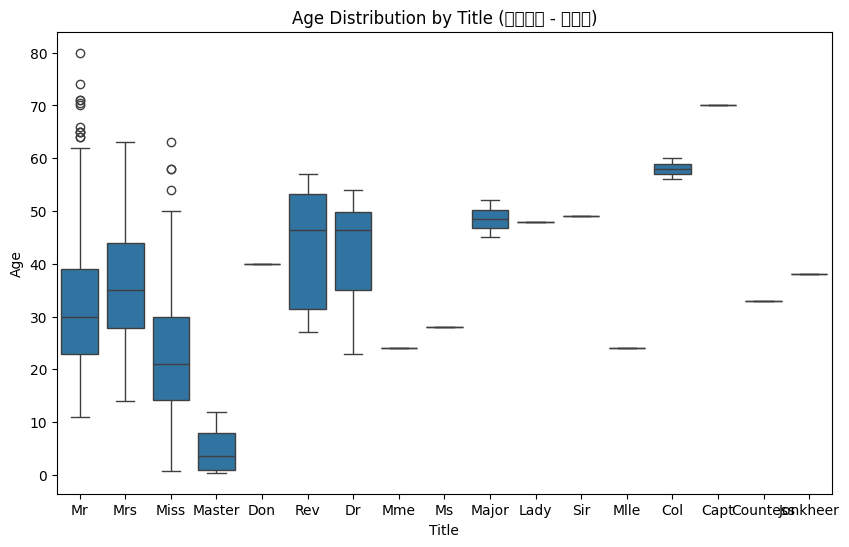

In [31]:
print("\n--- 3. 【假設驗證】各 'Title' 的年齡中位數：---")
median_ages = train_data.groupby('Title')['Age'].median()
print(median_ages)

# 4. (可選) 讓我們用圖表來視覺化這個巨大差異！
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 4. 正在繪製 'Title' 與 'Age' 的關係圖... ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Title', y='Age', data=train_data)
plt.title("Age Distribution by Title (年齡分佈 - 依稱謂)")
plt.show()

In [39]:
import pandas as pd
import numpy as np
import re

print("--- 1. (高階) 正在處理 'Age' 缺失值 (依 'Title' 填充) ---")
# 1a. 建立 'Title' 欄位 (並清理稀有稱謂)
if 'Title' not in train_data.columns:
    train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
# 我們在 apply 之前先 .fillna('Other') 來處理 NaN 的 Title (如果有的話)
train_data['Title'] = train_data['Title'].fillna('Other').apply(lambda x: x if x in common_titles else 'Other')

# 1b. 用「稱謂的中位數年齡」來填充
median_ages_by_title = train_data.groupby('Title')['Age'].transform('median')
train_data['Age'] = train_data['Age'].fillna(median_ages_by_title)


print("\n--- 2. (高階) 正在處理 'Cabin' 缺失值 (依 'Ticket' 填充) ---")
# 2a. 【特徵工程】建立 'Deck' 欄位
train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'U')

# 2b. 【群體填充 - 已修正】
print("   - 正在建立 Ticket -> Deck 的映射...")
deck_map = train_data.groupby('Ticket')['Deck'].apply(
    lambda x: x[x != 'U'].mode()[0] if not x[x != 'U'].empty else 'U'
).to_dict()

# 2c. 將這個 'Ticket' -> 'Deck' 的對應關係，映射回 'Deck' 欄位
def fill_deck(row):
    if row['Deck'] == 'U':
        return deck_map.get(row['Ticket'], 'U')
    return row['Deck']
train_data['Deck'] = train_data.apply(fill_deck, axis=1)
print("   - 'Deck' 缺失值（依 'Ticket'）填充完畢！")


print("\n--- 3. (常規) 正在處理 'Embarked' 缺失值 ---")
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


print("\n--- 4. (常規)【安全版】 正在轉換所有文字欄位為數字... ---")

# 我們使用 pd.api.types.is_string_dtype 來檢查欄位是否為「文字」
# 如果是文字，才轉換。如果已經是數字 (int/float)，就跳過。

if pd.api.types.is_string_dtype(train_data['Sex']):
    train_data['Sex'] = train_data['Sex'].map( {'male': 0, 'female': 1} )
    print("   - 'Sex' 欄位已轉換。")
else:
    print("   - 'Sex' 欄位... 已是數字，跳過。")

if pd.api.types.is_string_dtype(train_data['Embarked']):
    train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    print("   - 'Embarked' 欄位已轉換。")
else:
    print("   - 'Embarked' 欄位... 已是數字，跳過。")

if pd.api.types.is_string_dtype(train_data['Title']):
    train_data['Title'] = train_data['Title'].map( {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4} )
    print("   - 'Title' 欄位已轉換。")
else:
    print("   - 'Title' 欄位... 已是數字，跳過。")

if pd.api.types.is_string_dtype(train_data['Deck']):
    train_data['Deck'] = train_data['Deck'].map( {d:i for i, d in enumerate(sorted(train_data['Deck'].unique()))} )
    print("   - 'Deck' 欄位已轉換。")
else:
    print("   - 'Deck' 欄位... 已是數字，跳過。")

print("   - 所有欄位已轉換為數字！")


print("\n✅ --- 所有高階資料清理完成！ ---")

# --- 最終驗證 ---
print("\n--- 最終缺失值檢查：---")
final_df = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'LastName'], axis=1, errors='ignore')
print(final_df.isnull().sum())

--- 1. (高階) 正在處理 'Age' 缺失值 (依 'Title' 填充) ---

--- 2. (高階) 正在處理 'Cabin' 缺失值 (依 'Ticket' 填充) ---
   - 正在建立 Ticket -> Deck 的映射...
   - 'Deck' 缺失值（依 'Ticket'）填充完畢！

--- 3. (常規) 正在處理 'Embarked' 缺失值 ---

--- 4. (常規)【安全版】 正在轉換所有文字欄位為數字... ---
   - 'Sex' 欄位已轉換。
   - 'Embarked' 欄位已轉換。
   - 'Title' 欄位已轉換。
   - 'Deck' 欄位已轉換。
   - 所有欄位已轉換為數字！

✅ --- 所有高階資料清理完成！ ---

--- 最終缺失值檢查：---
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Deck        0
dtype: int64


In [40]:
# 1. 定義我們要用來預測的「高階特徵」欄位
#    (注意：我們加入了 Title 和 Deck！)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Deck']

# 2. 準備 X (特徵資料) 和 y (目標資料)
#    (我們使用 train_data，因為它包含了所有清理過的欄位)
X = train_data[features]
y = train_data['Survived']

print("--- X (高階特徵資料) 的前 5 行：---")
print(X.head())
print("\n--- y (目標資料) 的前 5 行：---")
print(y.head())

--- X (高階特徵資料) 的前 5 行：---
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  Deck
0       3    0  22.0      1      0   7.2500         0      0     8
1       1    1  38.0      1      0  71.2833         1      2     2
2       3    1  26.0      0      0   7.9250         0      1     8
3       1    1  35.0      1      0  53.1000         0      2     2
4       3    0  35.0      0      0   8.0500         0      0     8

--- y (目標資料) 的前 5 行：---
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 建立一個決策樹模型
model = DecisionTreeClassifier(random_state=42)

# 2. 【用高階資料訓練模型】
print("--- 正在用「高階資料」訓練模型... ---")
model.fit(X, y)

# 3. 【評估模型】
print("--- 正在評估模型... ---")
predictions = model.predict(X)

# 4. 計算「準確率」
accuracy = accuracy_score(y, predictions)

print("🎉 --- 訓練與評估完成！ --- 🎉")
print(f"模型在「訓練資料」上的準確率 (Accuracy): {accuracy * 100:.2f}%")

--- 正在用「高階資料」訓練模型... ---
--- 正在評估模型... ---
🎉 --- 訓練與評估完成！ --- 🎉
模型在「訓練資料」上的準確率 (Accuracy): 98.43%


In [42]:
import pandas as pd
import numpy as np
import re

# --- A. 重新載入所有資料 (確保是乾淨的原始狀態) ---
train_data = pd.read_csv('/content/my-first-project/data/train.csv')
test_data = pd.read_csv('/content/my-first-project/data/test.csv')

# --- B. 從「訓練資料 (train_data)」中學習「所有清理規則」 ---
print("--- 正在從 train_data 學習「清理規則」... ---")

# 規則 1: 學習 'Title' 和 'Age' 的填充規則
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
train_data['Title'] = train_data['Title'].fillna('Other').apply(lambda x: x if x in common_titles else 'Other')
# 儲存「年齡填充地圖」
AGE_FILL_MAP = train_data.groupby('Title')['Age'].median().to_dict()
print(f"   - 學習到「年齡填充規則」: {AGE_FILL_MAP}")

# 規則 2: 學習 'Deck' (甲板) 的填充規則
train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'U')
# 儲存「甲板填充地圖」
DECK_MAP = train_data.groupby('Ticket')['Deck'].apply(
    lambda x: x[x != 'U'].mode()[0] if not x[x != 'U'].empty else 'U'
).to_dict()
print("   - 學習到「甲板填充規則」 (依票號)")

# 規則 3: 學習 'Embarked' (港口) 的填充規則
EMBARKED_FILL = train_data['Embarked'].mode()[0]
print(f"   - 學習到「港口填充規則」: '{EMBARKED_FILL}'")

# 規則 4: 學習 'Fare' (票價) 的填充規則 (test.csv 有一個缺失值)
FARE_FILL = train_data['Fare'].median()
print(f"   - 學習到「票價填充規則」: {FARE_FILL}")

# 規則 5: 學習「文字 -> 數字」的轉換規則
SEX_MAP = {'male': 0, 'female': 1}
EMBARKED_MAP = {'S': 0, 'C': 1, 'Q': 2}
TITLE_MAP = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}
DECK_MAP_FINAL = {d:i for i, d in enumerate(sorted(train_data['Deck'].unique()))}
# (我們也必須儲存「U」的值，以防 test.csv 中有新的 Deck 字母)
DECK_FILL_UNKNOWN = DECK_MAP_FINAL.get('U', 8)
print("   - 學習到所有「文字轉換」規則")


# --- C. 定義一個「萬用清理函式」 ---
# 這個函式會接收「任何」資料集 (df)，並套用我們學到的「規則」

def preprocess_data(df, age_map, deck_ticket_map, embarked_fill, fare_fill, maps):
    df_clean = df.copy() # 複製一份，才不會改到原始資料

    # 1. 處理 'Age' (使用「訓練集」的規則)
    df_clean['Title'] = df_clean['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df_clean['Title'] = df_clean['Title'].fillna('Other').apply(lambda x: x if x in common_titles else 'Other')
    df_clean['Age'] = df_clean['Age'].fillna(df_clean['Title'].map(age_map))
    # (如果 test.csv 中有 train 沒見過的 Title，map 會產生 NaN，再補一次)
    df_clean['Age'] = df_clean['Age'].fillna(df['Age'].median())

    # 2. 處理 'Deck' (使用「訓練集」的規則)
    df_clean['Deck'] = df_clean['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'U')
    def fill_deck(row):
        if row['Deck'] == 'U':
            return deck_ticket_map.get(row['Ticket'], 'U')
        return row['Deck']
    df_clean['Deck'] = df_clean.apply(fill_deck, axis=1)

    # 3. 處理 'Embarked' 和 'Fare' (使用「訓練集」的規則)
    df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_fill)
    df_clean['Fare'] = df_clean['Fare'].fillna(fare_fill)

    # 4. 轉換文字 (使用「訓練集」的規則)
    df_clean['Sex'] = df_clean['Sex'].map(maps['sex'])
    df_clean['Embarked'] = df_clean['Embarked'].map(maps['embarked'])
    df_clean['Title'] = df_clean['Title'].map(maps['title'])
    df_clean['Deck'] = df_clean['Deck'].map(maps['deck'])
    # (處理 test.csv 中可能出現的、train.csv 沒見過的 Deck 字母)
    df_clean['Deck'] = df_clean['Deck'].fillna(maps['deck_unknown'])

    return df_clean

print("\n✅ --- 清理函式 `preprocess_data` 建立完成！ ---")

--- 正在從 train_data 學習「清理規則」... ---
   - 學習到「年齡填充規則」: {'Master': 3.5, 'Miss': 21.0, 'Mr': 30.0, 'Mrs': 35.0, 'Other': 44.5}
   - 學習到「甲板填充規則」 (依票號)
   - 學習到「港口填充規則」: 'S'
   - 學習到「票價填充規則」: 14.4542
   - 學習到所有「文字轉換」規則

✅ --- 清理函式 `preprocess_data` 建立完成！ ---


In [43]:
# 1. 儲存我們學到的所有「規則」
all_rules = {
    "age_map": AGE_FILL_MAP,
    "deck_ticket_map": DECK_MAP,
    "embarked_fill": EMBARKED_FILL,
    "fare_fill": FARE_FILL,
    "maps": {
        "sex": SEX_MAP,
        "embarked": EMBARKED_MAP,
        "title": TITLE_MAP,
        "deck": DECK_MAP_FINAL,
        "deck_unknown": DECK_FILL_UNKNOWN
    }
}

# 2. 【清理資料】
print("--- 正在清理 train_data... ---")
train_clean = preprocess_data(train_data, **all_rules) # **all_rules 會自動解開字典
print("--- 正在清理 test_data... ---")
test_clean = preprocess_data(test_data, **all_rules)

# 3. 【準備 X 和 y】
# (我們也把 test_data 中缺失的 'Title' 和 'Deck' 轉成 0)
test_clean['Title'] = test_clean['Title'].fillna(0)
test_clean['Deck'] = test_clean['Deck'].fillna(0)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Deck']
X_train = train_clean[features]
y_train = train_clean['Survived']

X_test = test_clean[features] # 這是我們的「考卷」

# 4. 【重新訓練模型】
#    (我們使用乾淨的 train_clean 重新訓練)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
print("--- 正在重新訓練模型... ---")
model.fit(X_train, y_train)

# 5. 【用模型寫考卷】
print("--- 正在用模型預測 test_data... ---")
test_predictions = model.predict(X_test)

print("✅ --- 預測完成！ ---")
print(f"已生成 {len(test_predictions)} 筆預測結果。")

--- 正在清理 train_data... ---
--- 正在清理 test_data... ---
--- 正在重新訓練模型... ---
--- 正在用模型預測 test_data... ---
✅ --- 預測完成！ ---
已生成 418 筆預測結果。


In [44]:
# 1. 建立一個新的 DataFrame 來存放結果
#    'PassengerId' 來自我們一開始載入的 test_data
#    'Survived' 來自我們剛剛的預測 test_predictions
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})

# 2. 將這個 DataFrame 存成 .csv 檔案
submission.to_csv('submission.csv', index=False) # index=False 是必須的

print("🎉 --- 提交檔案 submission.csv 建立完成！ --- 🎉")
print("\n--- 檔案預覽 (前 5 行) ---")
print(submission.head())

🎉 --- 提交檔案 submission.csv 建立完成！ --- 🎉

--- 檔案預覽 (前 5 行) ---
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # 載入我們的「縮放」工具
from sklearn.metrics import accuracy_score

# ----------------------------------------------------
# 1. 【新增步驟】特徵縮放
#    我們在 X_train 和 X_test 上都執行這個步驟
# ----------------------------------------------------
print("--- 1. 正在進行「特徵縮放」(Scaling)... ---")

# 1a. 建立一個縮放器 (Scaler)
scaler = StandardScaler()

# 1b. 【關鍵】讓縮放器「學習」訓練資料 (X_train) 的平均值和標準差
#     注意：我們「只」在 X_train 上 .fit()，這是黃金準則！
scaler.fit(X_train)

# 1c. 使用學習到的規則，來「轉換」訓練集和測試集
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("   - 特徵縮放完成！")

# ----------------------------------------------------
# 2. 訓練「邏輯斯迴歸」模型
# ----------------------------------------------------
print("\n--- 2. 正在訓練「邏輯斯迴歸」模型... ---")

# 2a. 建立模型 (C=1.0 是預設值，random_state 確保結果可重現)
model_lr = LogisticRegression(C=1.0, random_state=42, max_iter=1000) # 增加 max_iter 確保收斂

# 2b. 【用「縮放後」的資料】訓練模型
model_lr.fit(X_train_scaled, y_train)

print("   - 模型訓練完成！")

# ----------------------------------------------------
# 3. 評估與提交
# ----------------------------------------------------
print("\n--- 3. 正在評估與產生提交檔案... ---")

# 3a. 評估一下「訓練集」上的分數 (你會發現這個分數會比 98% 低，這是好事！)
train_preds_lr = model_lr.predict(X_train_scaled)
train_accuracy_lr = accuracy_score(y_train, train_preds_lr)
print(f"   - (參考) 邏輯斯迴歸在「訓練集」上的準確率: {train_accuracy_lr * 100:.2f}%")

# 3b. 【用「縮放後」的資料】預測「考卷 (X_test)」
test_predictions_lr = model_lr.predict(X_test_scaled)

# 3c. 建立提交檔案
submission_lr = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions_lr
})

# 3d. 儲存檔案
submission_lr.to_csv('submission_logistic.csv', index=False)

print("\n🎉 --- 全新提交檔案 submission_logistic.csv 建立完成！ --- 🎉")
print(submission_lr.head())

--- 1. 正在進行「特徵縮放」(Scaling)... ---
   - 特徵縮放完成！

--- 2. 正在訓練「邏輯斯迴歸」模型... ---
   - 模型訓練完成！

--- 3. 正在評估與產生提交檔案... ---
   - (參考) 邏輯斯迴歸在「訓練集」上的準確率: 81.26%

🎉 --- 全新提交檔案 submission_logistic.csv 建立完成！ --- 🎉
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
